In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path="D:\Ai\Data Analyst Internn\CognoRise internship\BigMart Sales\Train.csv"
df_sales=pd.read_csv(path,parse_dates=["Outlet_Establishment_Year"],date_format="%Y")

In [4]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998-01-01,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_sales.shape

(8523, 12)

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                7060 non-null   float64       
 2   Item_Fat_Content           8523 non-null   object        
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   object        
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                6113 non-null   object        
 9   Outlet_Location_Type       8523 non-null   object        
 10  Outlet_Type                8523 non-null   object        
 11  Item_Outlet_Sales          8523 non-null   float64       
dtypes: dat

In [7]:
df_sales.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5270,NCA06,20.500,Low Fat,0.143284,Household,37.9190,OUT046,1997-01-01,Small,Tier 1,Supermarket Type1,183.0950
6997,FDU52,NaN,Low Fat,0.111655,Frozen Foods,157.0630,OUT019,1985-01-01,Small,Tier 1,Grocery Store,312.9260
113,FDX34,NaN,Low Fat,0.071637,Snack Foods,121.7098,OUT027,1985-01-01,Medium,Tier 3,Supermarket Type3,4097.3332
1371,FDD52,18.250,Regular,0.184042,Dairy,110.1570,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,1867.5690
353,DRI01,7.970,Low Fat,0.034453,Soft Drinks,174.0422,OUT046,1997-01-01,Small,Tier 1,Supermarket Type1,2586.6330
1361,FDX36,9.695,Regular,0.129009,Baking Goods,226.9404,OUT017,2007-01-01,NaN,Tier 2,Supermarket Type1,2700.4848
3822,FDA44,NaN,Low Fat,0.052965,Fruits and Vegetables,57.7930,OUT027,1985-01-01,Medium,Tier 3,Supermarket Type3,1754.3830
5754,FDH47,13.500,Regular,0.128792,Starchy Foods,95.4068,OUT035,2004-01-01,Small,Tier 2,Supermarket Type1,1944.1360
2372,NCX06,17.600,Low Fat,0.015776,Household,179.1976,OUT017,2007-01-01,NaN,Tier 2,Supermarket Type1,3803.0496
4485,NCV29,11.800,Low Fat,0.022844,Health and Hygiene,177.8686,OUT046,1997-01-01,Small,Tier 1,Supermarket Type1,4621.9836


In [8]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523,8523.000000
mean,12.857645,0.066132,140.992782,1997-10-31 13:12:33.959873408,2181.288914
min,4.555000,0.000000,31.290000,1985-01-01 00:00:00,33.290000
25%,8.773750,0.026989,93.826500,1987-01-01 00:00:00,834.247400
50%,12.600000,0.053931,143.012800,1999-01-01 00:00:00,1794.331000
75%,16.850000,0.094585,185.643700,2004-01-01 00:00:00,3101.296400
max,21.350000,0.328391,266.888400,2009-01-01 00:00:00,13086.964800
std,4.643456,0.051598,62.275067,NaN,1706.499616


In [9]:
for col in df_sales.columns :
    print( f"{col} unique values is:\n {df_sales[col].unique()} \n ---------------- " )

Item_Identifier unique values is:
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 
 ---------------- 
Item_Weight unique values is:
 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.

# Clean Data

In [10]:
df_sales.duplicated().sum()

0

In [11]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#normalize the numbers
((df_sales.isna().sum())/df_sales.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [13]:
df_sales.shape

(8523, 12)

In [14]:
df_sales["Item_Weight"].fillna(df_sales["Item_Weight"].mean(),inplace=True)

In [15]:
df_sales["Item_Weight"].isna().sum()

0

In [16]:
df_sales.dropna(inplace=True)
df_sales.shape

(6113, 12)

In [17]:
df_sales["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [18]:
df_sales["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [19]:
df_sales["Item_Fat_Content"]=df_sales["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

In [20]:
df_sales["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Handling Outliers

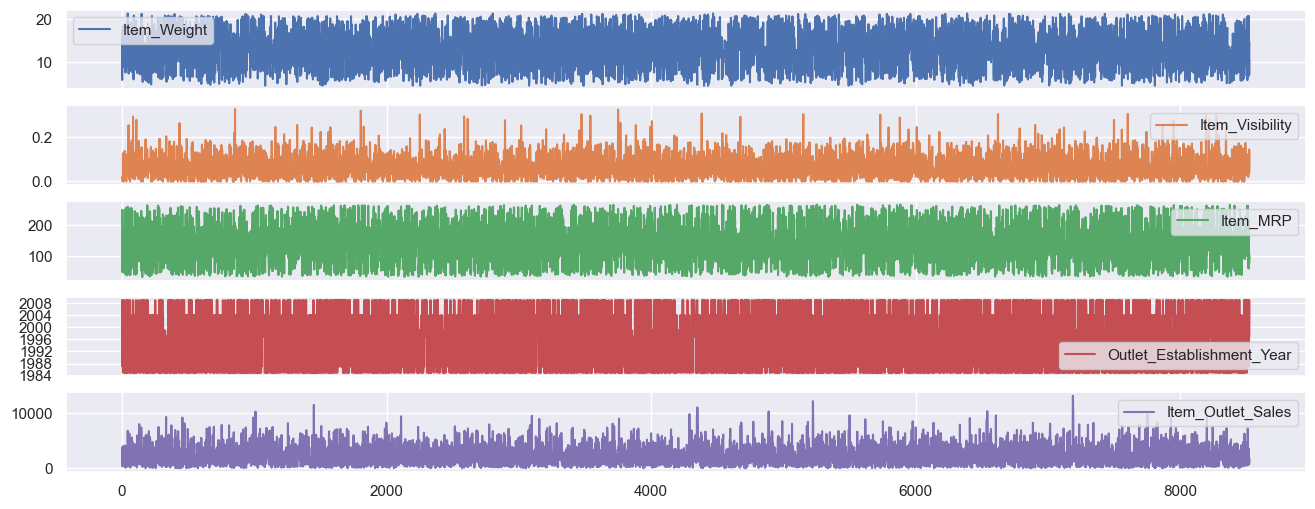

In [21]:
# Visualize Trends 

df_sales.plot(subplots=True,figsize=(16,6))
plt.show()

In [22]:
per25=df_sales["Item_Visibility"].quantile(0.25)
per75=df_sales["Item_Visibility"].quantile(0.75)
print(per25,per75)

0.026681262 0.092834313


In [23]:
iqr=per75-per25
iqr

0.066153051

In [24]:
upper=per75+(iqr*1.5)
lower=per25-(iqr*1.5)
upper,lower

(0.1920638895, -0.0725483145)

In [25]:
df_sales=df_sales[(df_sales["Item_Visibility"] <= upper )&(df_sales["Item_Visibility"]>=lower)]
df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997-01-01,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004-01-01,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,1845.5976


In [26]:
per25=df_sales["Item_Outlet_Sales"].quantile(0.25)
per75=df_sales["Item_Outlet_Sales"].quantile(0.75)
print(per25,per75)

1006.6896 3292.381


In [27]:
iqr=per75-per25
iqr

2285.6913999999997

In [28]:
upper=per75+(iqr*1.5)
lower=per25-(iqr*1.5)
upper,lower

(6720.918099999999, -2421.8474999999994)

In [29]:
df_sales=df_sales[(df_sales["Item_Outlet_Sales"] <= upper )&(df_sales["Item_Outlet_Sales"]>=lower)]
df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997-01-01,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004-01-01,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,1845.5976


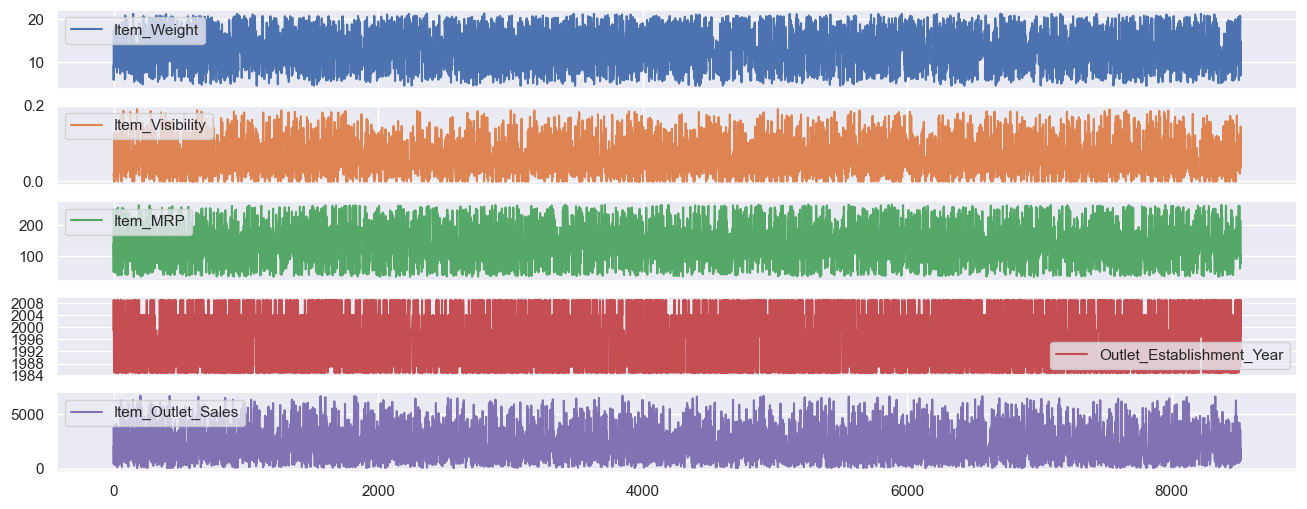

In [30]:
df_sales.plot(subplots=True,figsize=(16,6))
plt.show()

In [31]:
df_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Visualization

<Figure size 1600x600 with 0 Axes>

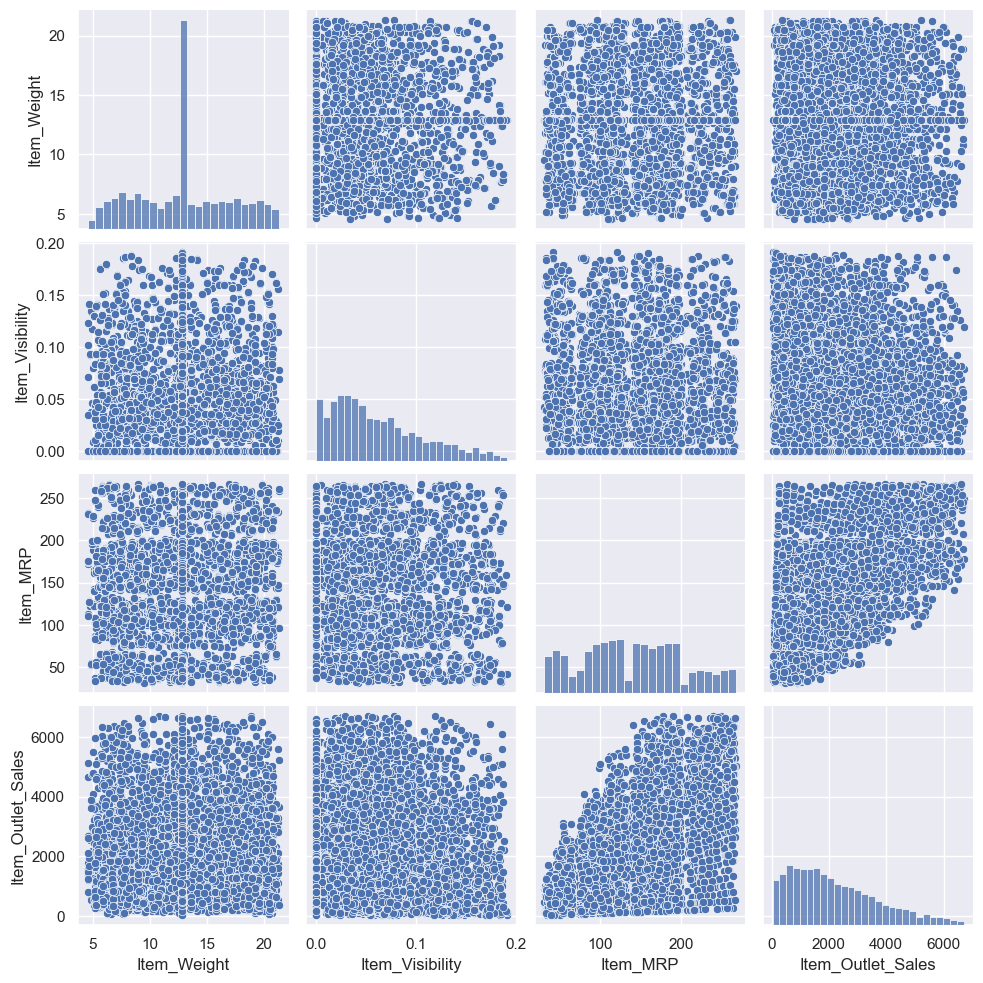

In [32]:
plt.figure(figsize=(16,6))
sns.pairplot(df_sales)
plt.show()

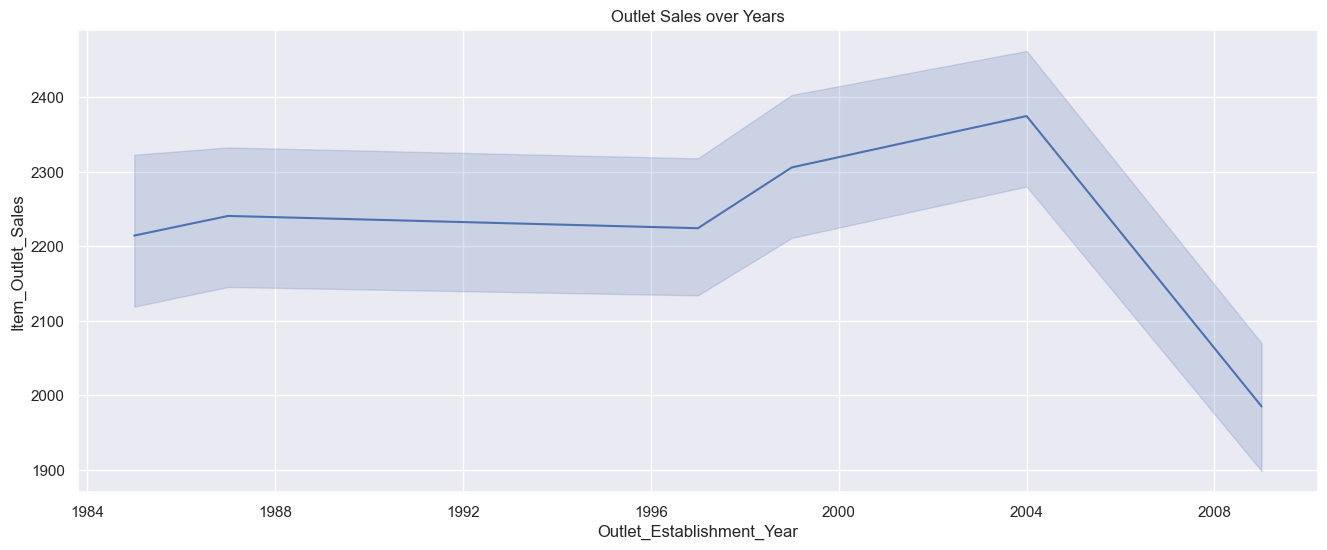

In [33]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_sales,x="Outlet_Establishment_Year",y="Item_Outlet_Sales")
plt.title("Outlet Sales over Years")
plt.show()

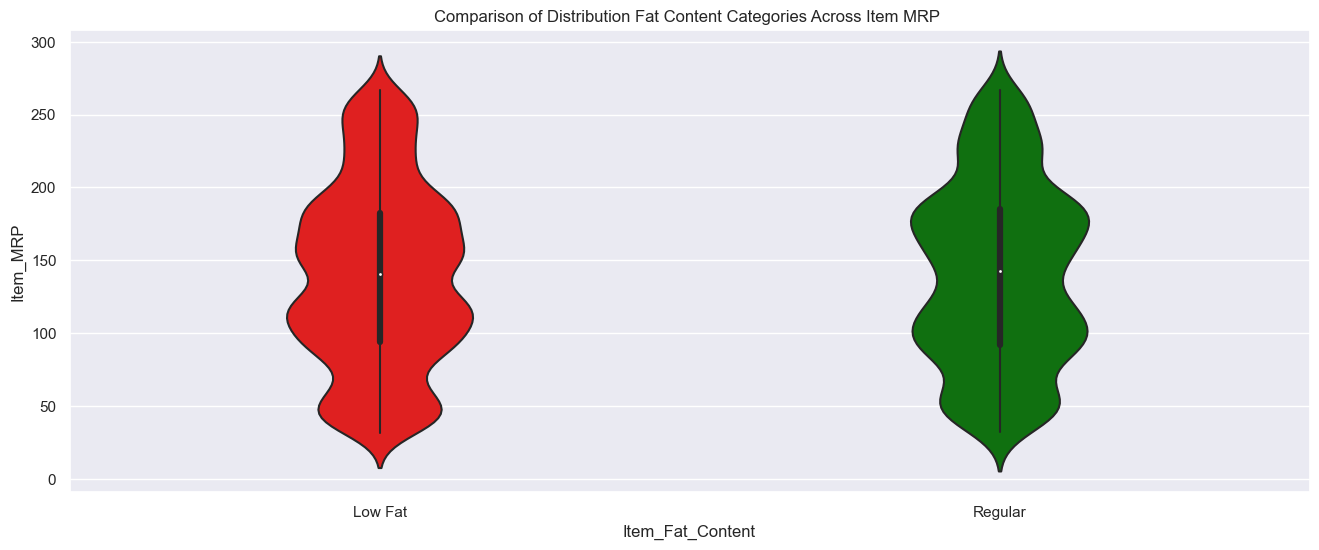

In [34]:
plt.figure(figsize=(16,6))
sns.violinplot(data=df_sales,x="Item_Fat_Content",y="Item_MRP",width=0.3,palette=["red","green"])
plt.title("Comparison of Distribution Fat Content Categories Across Item MRP ")
plt.show()

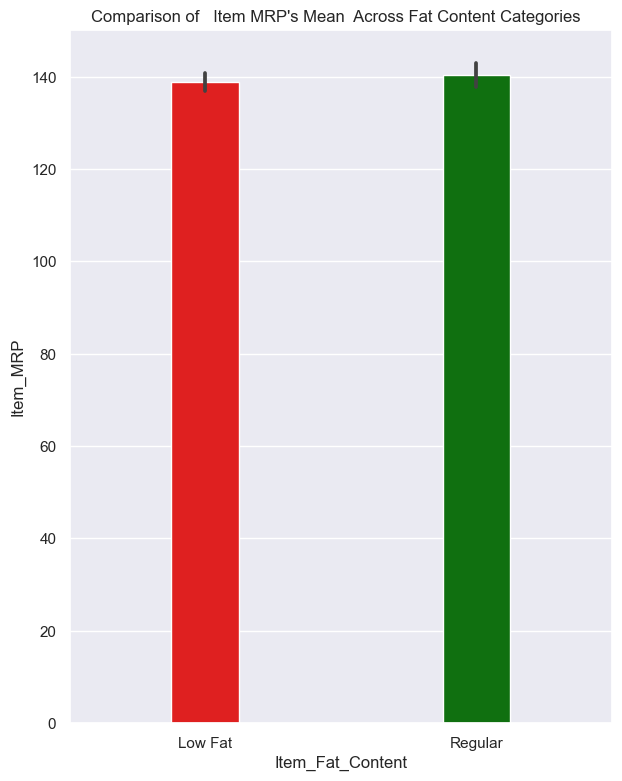

In [61]:
plt.figure(figsize=(7,9))
sns.barplot(data=df_sales,x="Item_Fat_Content",y="Item_MRP",width=0.25,palette=["red","green"],)
plt.title("Comparison of   Item MRP's Mean  Across Fat Content Categories  ")

plt.show()

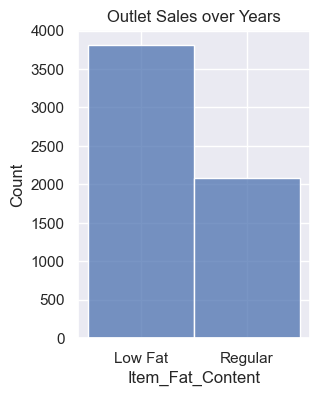

In [36]:
plt.figure(figsize=(3,4))
sns.histplot(df_sales["Item_Fat_Content"])
plt.title("Outlet Sales over Years")
plt.show()

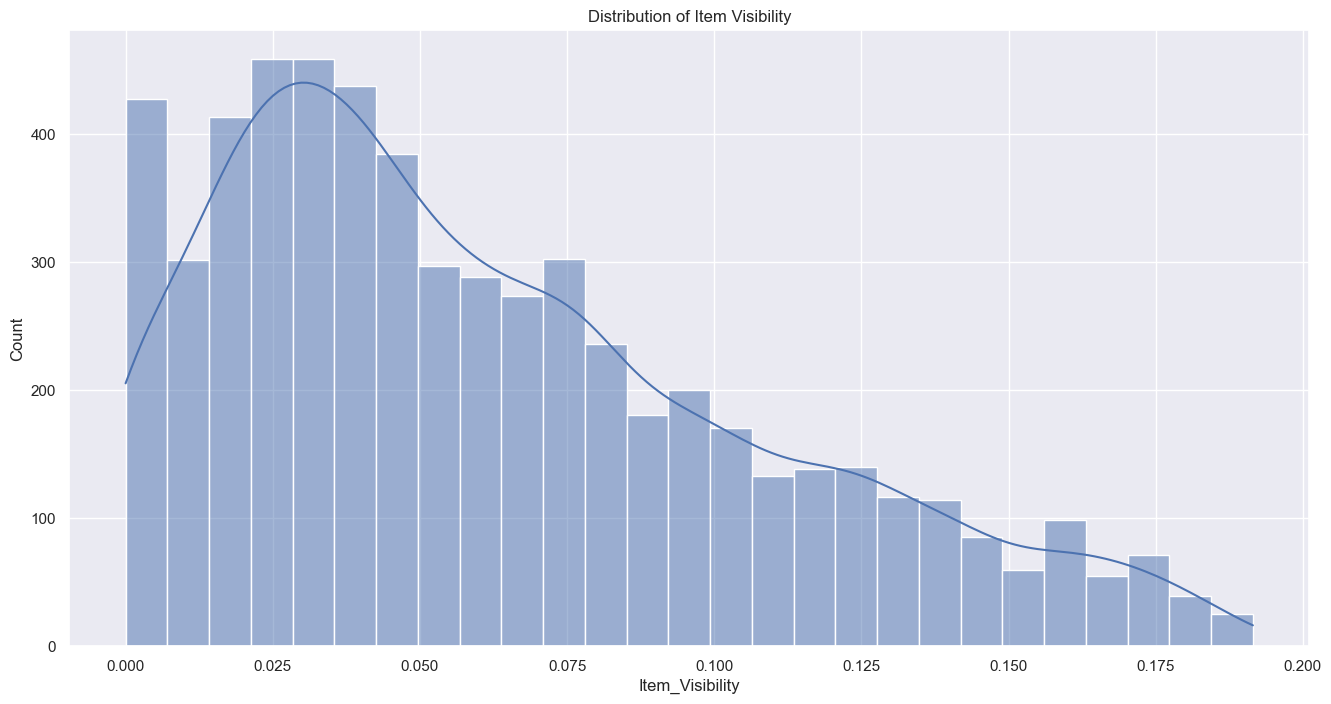

In [37]:
plt.figure(figsize=(16,8))
sns.histplot(df_sales["Item_Visibility"],kde=True)
plt.title("Distribution of Item Visibility")
plt.show()

In [38]:
df_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

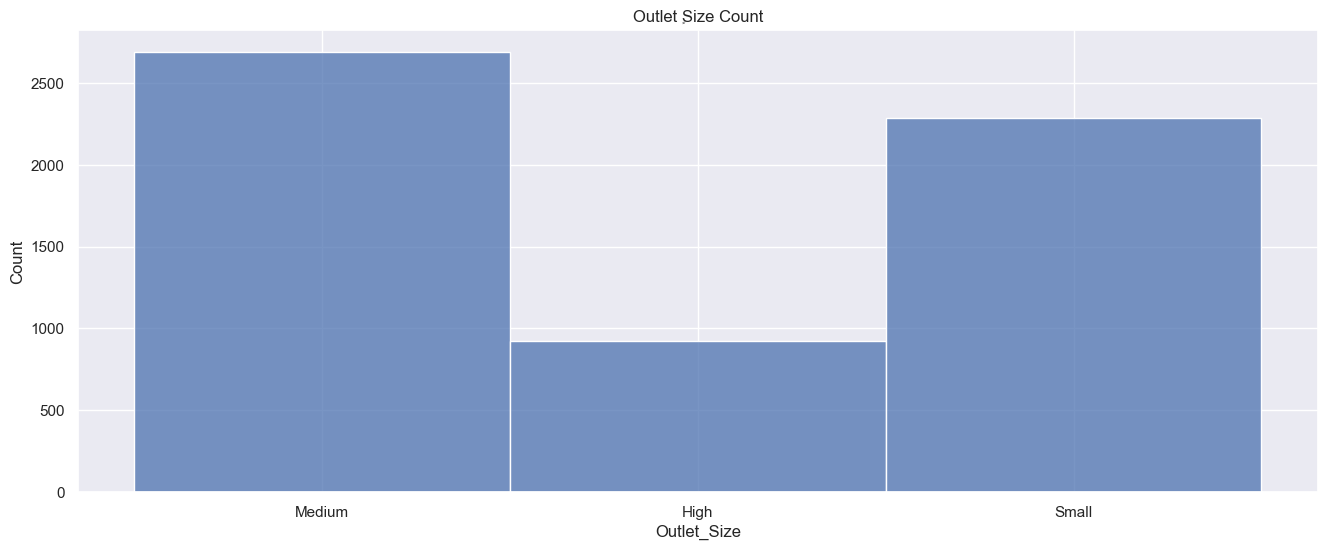

In [39]:
plt.figure(figsize=(16,6))
sns.histplot(df_sales["Outlet_Size"])
plt.title("Outlet ٍSize Count")
plt.show()

In [40]:
df_sales["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

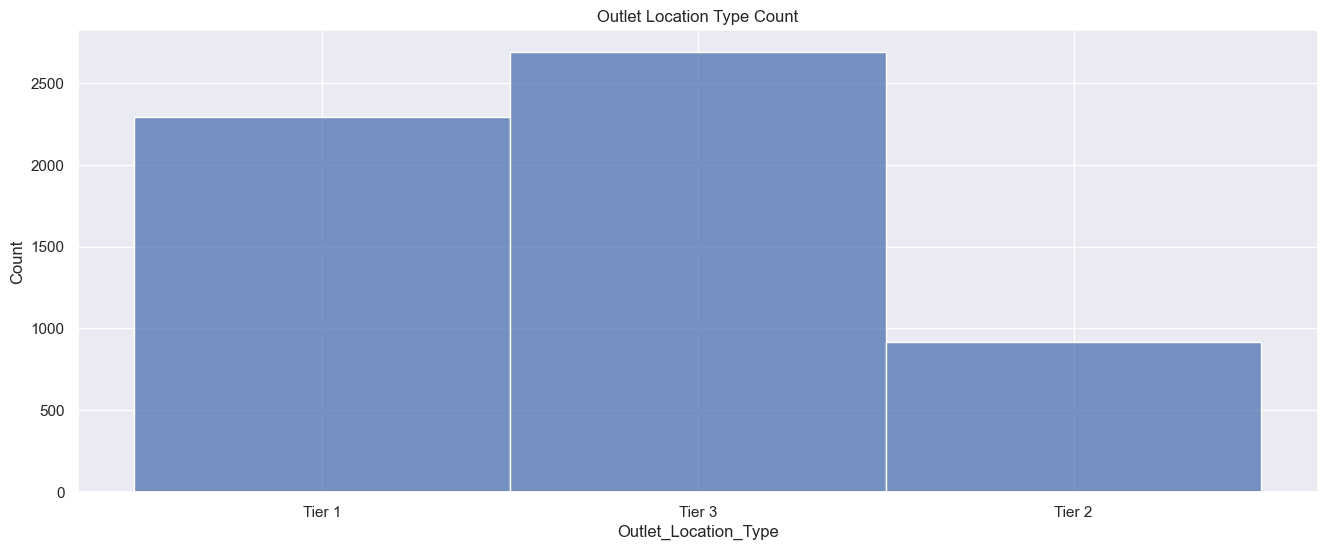

In [41]:
plt.figure(figsize=(16,6))
sns.histplot(df_sales["Outlet_Location_Type"])
plt.title("Outlet Location Type Count")
plt.show()

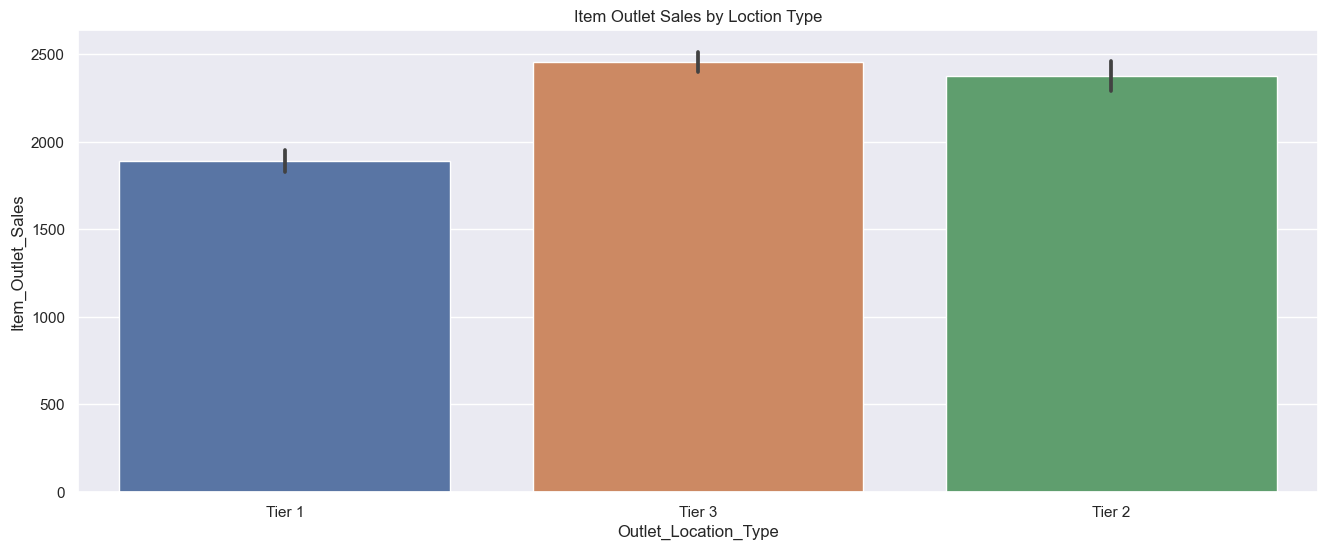

In [42]:
plt.figure(figsize=(16,6))
sns.barplot(x=df_sales["Outlet_Location_Type"],y=df_sales["Item_Outlet_Sales"])
plt.title("Item Outlet Sales by Loction Type")
plt.show()

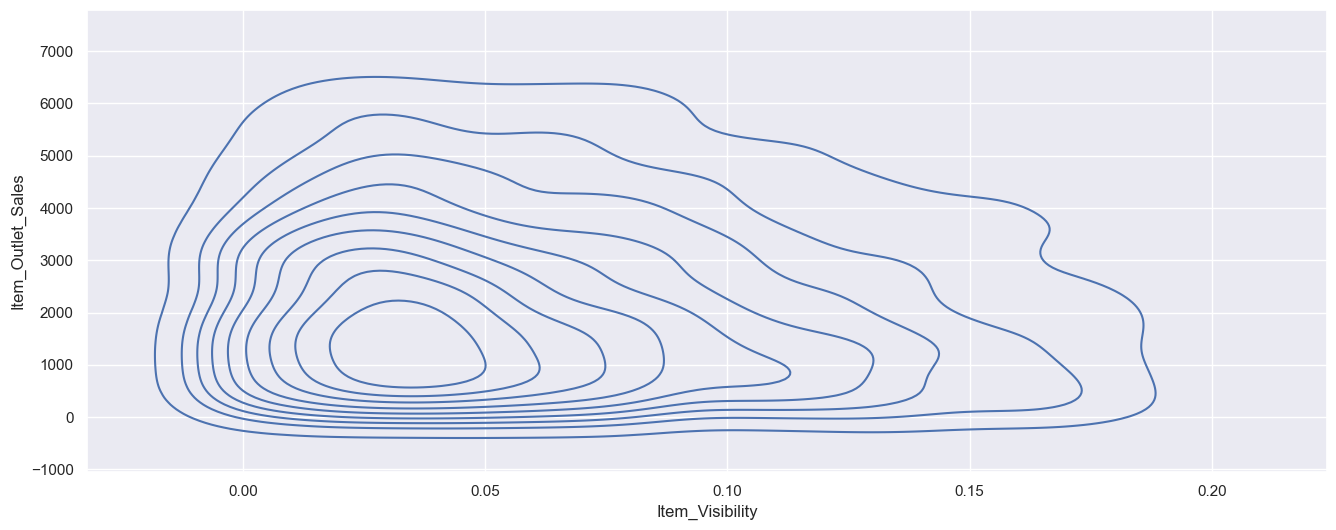

In [65]:
plt.figure(figsize=(16,6))
sns.kdeplot(x=df_sales["Item_Visibility"],y=df_sales["Item_Outlet_Sales"])
plt.show()

In [44]:
df_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')